# Séance 2 - *correction*

In [1]:
import matplotlib.pyplot
import scipy.stats
import numpy
import pandas
import seaborn

## Récupérer les données dans un DataFrame

In [2]:
url = "listings.csv"
data = pandas.read_csv(url, header = 0, sep = ",")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


## Donner le nombre de logements total

In [3]:
data.shape[0]

95461

## Lister les différentes valeurs que prend la variable neighbourhood

In [4]:
data["neighbourhood"].unique()

array(['Hôtel-de-Ville', 'Entrepôt', 'Gobelins', 'Élysée', 'Opéra',
       'Batignolles-Monceau', 'Buttes-Montmartre', 'Reuilly', 'Temple',
       'Vaugirard', 'Ménilmontant', 'Popincourt', 'Buttes-Chaumont',
       'Passy', 'Luxembourg', 'Palais-Bourbon', 'Observatoire', 'Louvre',
       'Bourse', 'Panthéon'], dtype=object)

## Lister les différentes valeurs que prend la variable room_type

In [5]:
data["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

## Donner les 3 arrondissements avec le plus de logements

In [6]:
pandas.crosstab(data["neighbourhood"], "NbLogements").sort_values("NbLogements", ascending = False).head(3)

col_0,NbLogements
neighbourhood,
Buttes-Montmartre,10532
Popincourt,8392
Vaugirard,7727


## Donner les 3 arrondissements pour lesquels le prix est le plus élevé

In [7]:
data.groupby("neighbourhood")["price"].agg(["mean"]).sort_values("mean", ascending = False).head(3).round(2)

,mean
neighbourhood,
Élysée,442.04
Palais-Bourbon,409.84
Passy,407.62


## Décrire les variables price, number_of_reviews et reviews_per_month

In [8]:
data.filter(["price", "number_of_reviews", "reviews_per_month"]).describe().round(2)

,price,number_of_reviews,reviews_per_month
count,64230.00,95461.00,68319.00
mean,256.02,20.95,1.09
std,522.27,53.28,1.32
min,8.00,0.00,0.01
25%,103.00,0.00,0.23
50%,155.00,4.00,0.67
75%,256.00,19.00,1.48
max,30400.00,3295.00,41.88


### `price`

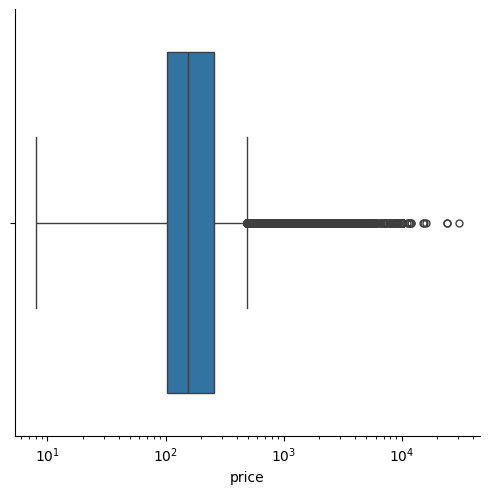

In [9]:
g = seaborn.catplot(data = data, x = "price", kind = "box")
g.fig.axes[0].set_xscale('log')

### `number_of_reviews`

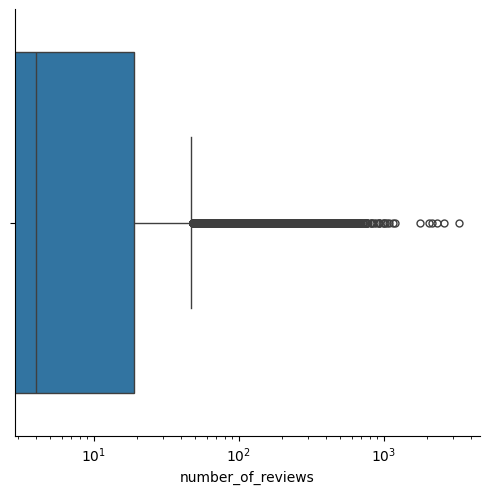

In [10]:
g = seaborn.catplot(data = data, x = "number_of_reviews", kind = "box")
g.fig.axes[0].set_xscale('log')

### `reviews_per_month`

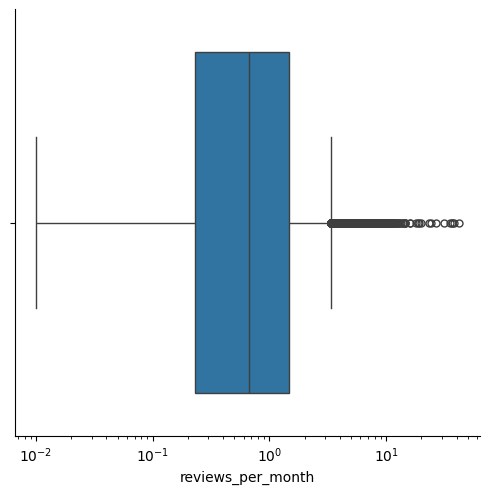

In [11]:
g = seaborn.catplot(data = data, x = "reviews_per_month", kind = "box")
g.fig.axes[0].set_xscale('log')

## Décrire les variables room_type et neighboorhood

### `room_type`

In [12]:
tab = pandas.concat(
    [
        pandas.crosstab(data["room_type"], "#"),
        (pandas.crosstab(data["room_type"], "%", normalize = True) * 100).round(2)
    ], 
    axis = 1).sort_values("#", ascending = False)
tab

col_0,#,%
room_type,,
Entire home/apt,85268,89.32
Private room,9055,9.49
Hotel room,752,0.79
Shared room,386,0.40


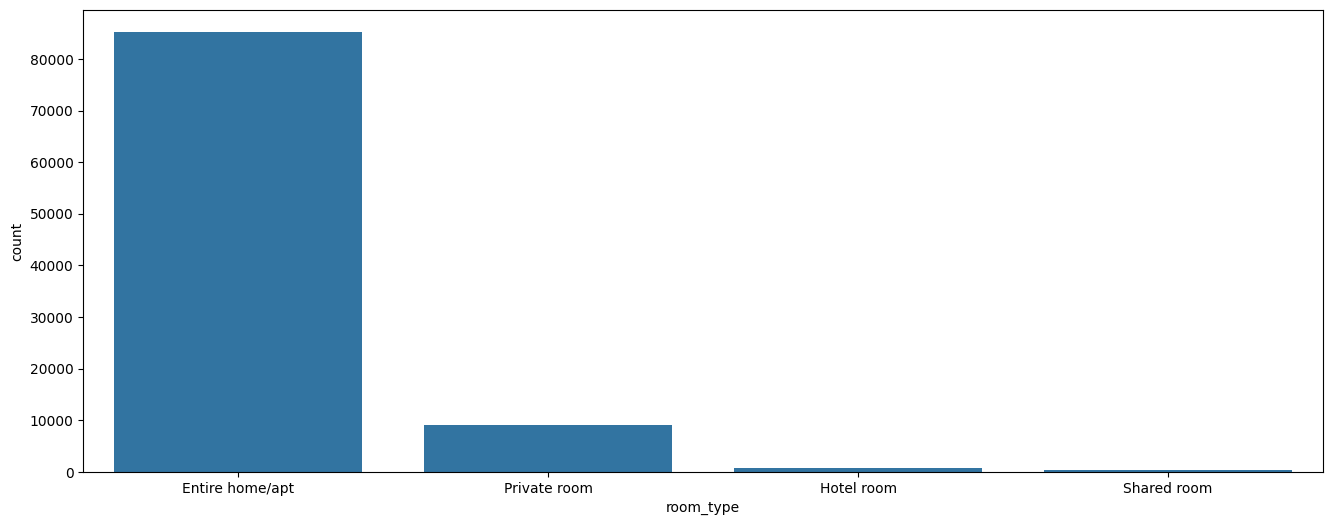

In [13]:
matplotlib.pyplot.figure(figsize = (16, 6))
seaborn.countplot(x = "room_type", data = data, order = tab.index);

### `neighbourhood`

In [14]:
tab = pandas.concat(
    [
        pandas.crosstab(data["neighbourhood"], "#"),
        (pandas.crosstab(data["neighbourhood"], "%", normalize = True) * 100).round(2)
    ], 
    axis = 1).sort_values("#", ascending = False)
tab

col_0,#,%
neighbourhood,,
Buttes-Montmartre,10532,11.03
Popincourt,8392,8.79
Vaugirard,7727,8.09
Batignolles-Monceau,6673,6.99
Entrepôt,6464,6.77
Passy,6225,6.52
Buttes-Chaumont,5387,5.64
Ménilmontant,5183,5.43
Opéra,4652,4.87


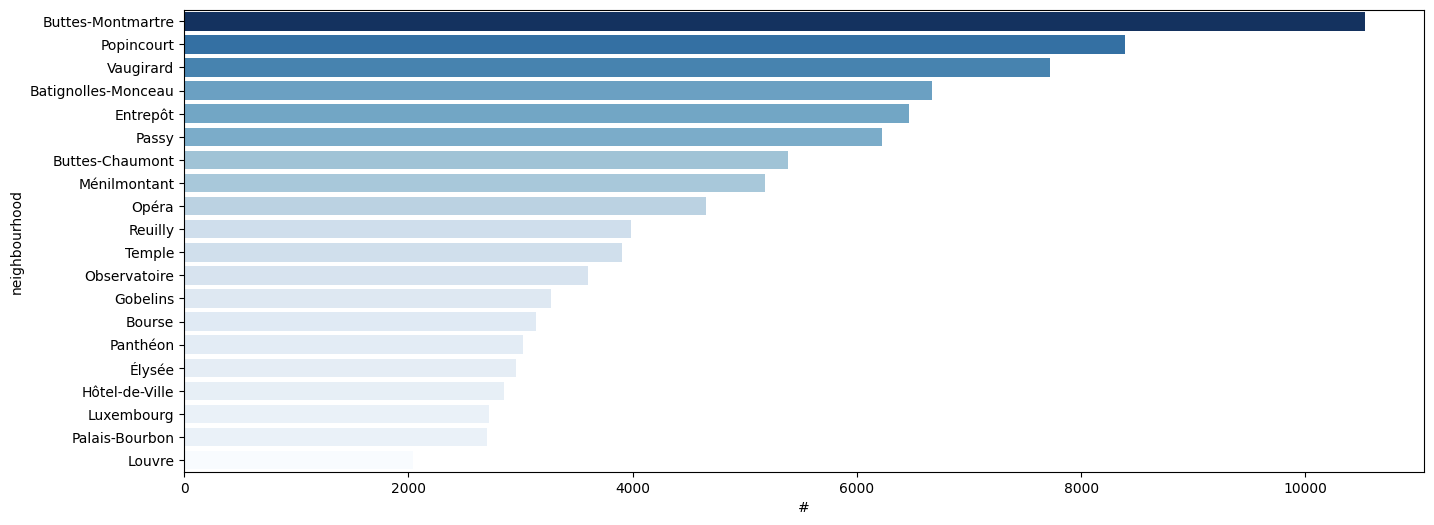

In [15]:
matplotlib.pyplot.figure(figsize = (16, 6))
seaborn.barplot(y = "neighbourhood", x = "#", hue = "#", data = tab, 
                  order = tab.index, legend = False, palette = "Blues");

## Décrire le lien entre price et room_type

In [16]:
tab = data.groupby("room_type")["price"] \
            .agg(PrixMoyen = "mean") \
            .sort_values("PrixMoyen", ascending = False) \
            .round(2)
tab

,PrixMoyen
room_type,
Hotel room,322.04
Entire home/apt,262.37
Private room,189.62
Shared room,115.54


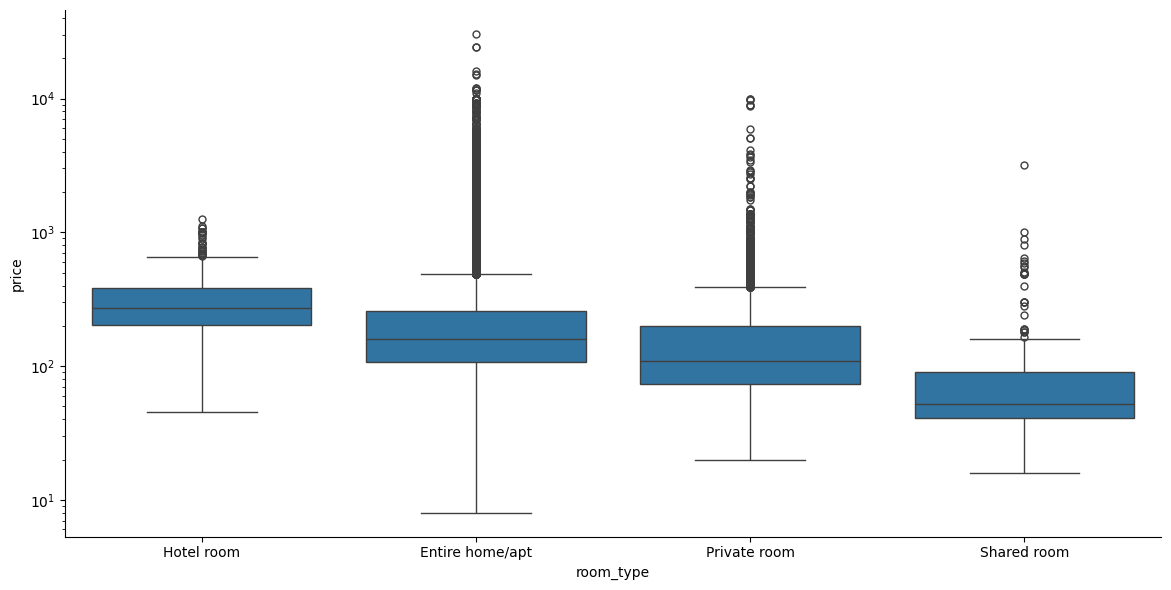

In [17]:
g = seaborn.catplot(data = data, x = "room_type", y = "price", kind = "box",
                    order = tab.index,
                    height = 6, aspect = 2)
g.fig.axes[0].set_yscale('log')

## Décrire le lien entre price et neighboorhood

In [18]:
tab = data.groupby("neighbourhood")["price"] \
            .agg(PrixMoyen = "mean") \
            .sort_values("PrixMoyen", ascending = False) \
            .round(2)
tab

,PrixMoyen
neighbourhood,
Élysée,442.04
Palais-Bourbon,409.84
Passy,407.62
Louvre,338.56
Luxembourg,336.12
Hôtel-de-Ville,291.04
Batignolles-Monceau,265.82
Opéra,257.74
Bourse,257.03


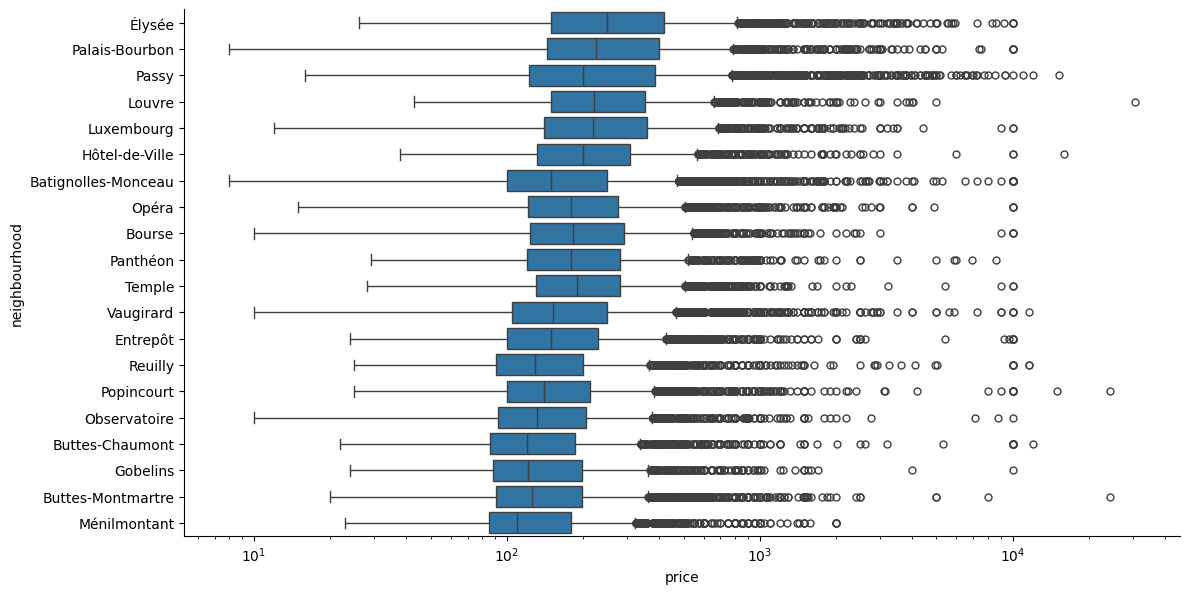

In [19]:
g = seaborn.catplot(data = data, y = "neighbourhood", x = "price", 
                    kind = "box", order = tab.index, 
                    height = 6, aspect = 2)
g.fig.axes[0].set_xscale('log')

## Décrire le lien entre room_type et neighboorhood

In [20]:
pandas.crosstab(data["neighbourhood"], data["room_type"], normalize = "index").round(2)

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Batignolles-Monceau,0.90,0.01,0.09,0.00
Bourse,0.93,0.00,0.07,0.00
Buttes-Chaumont,0.88,0.00,0.11,0.01
Buttes-Montmartre,0.91,0.01,0.08,0.00
Entrepôt,0.89,0.00,0.10,0.01
Gobelins,0.85,0.00,0.14,0.01
Hôtel-de-Ville,0.92,0.00,0.07,0.00
Louvre,0.89,0.02,0.09,0.00
Luxembourg,0.88,0.03,0.09,0.00


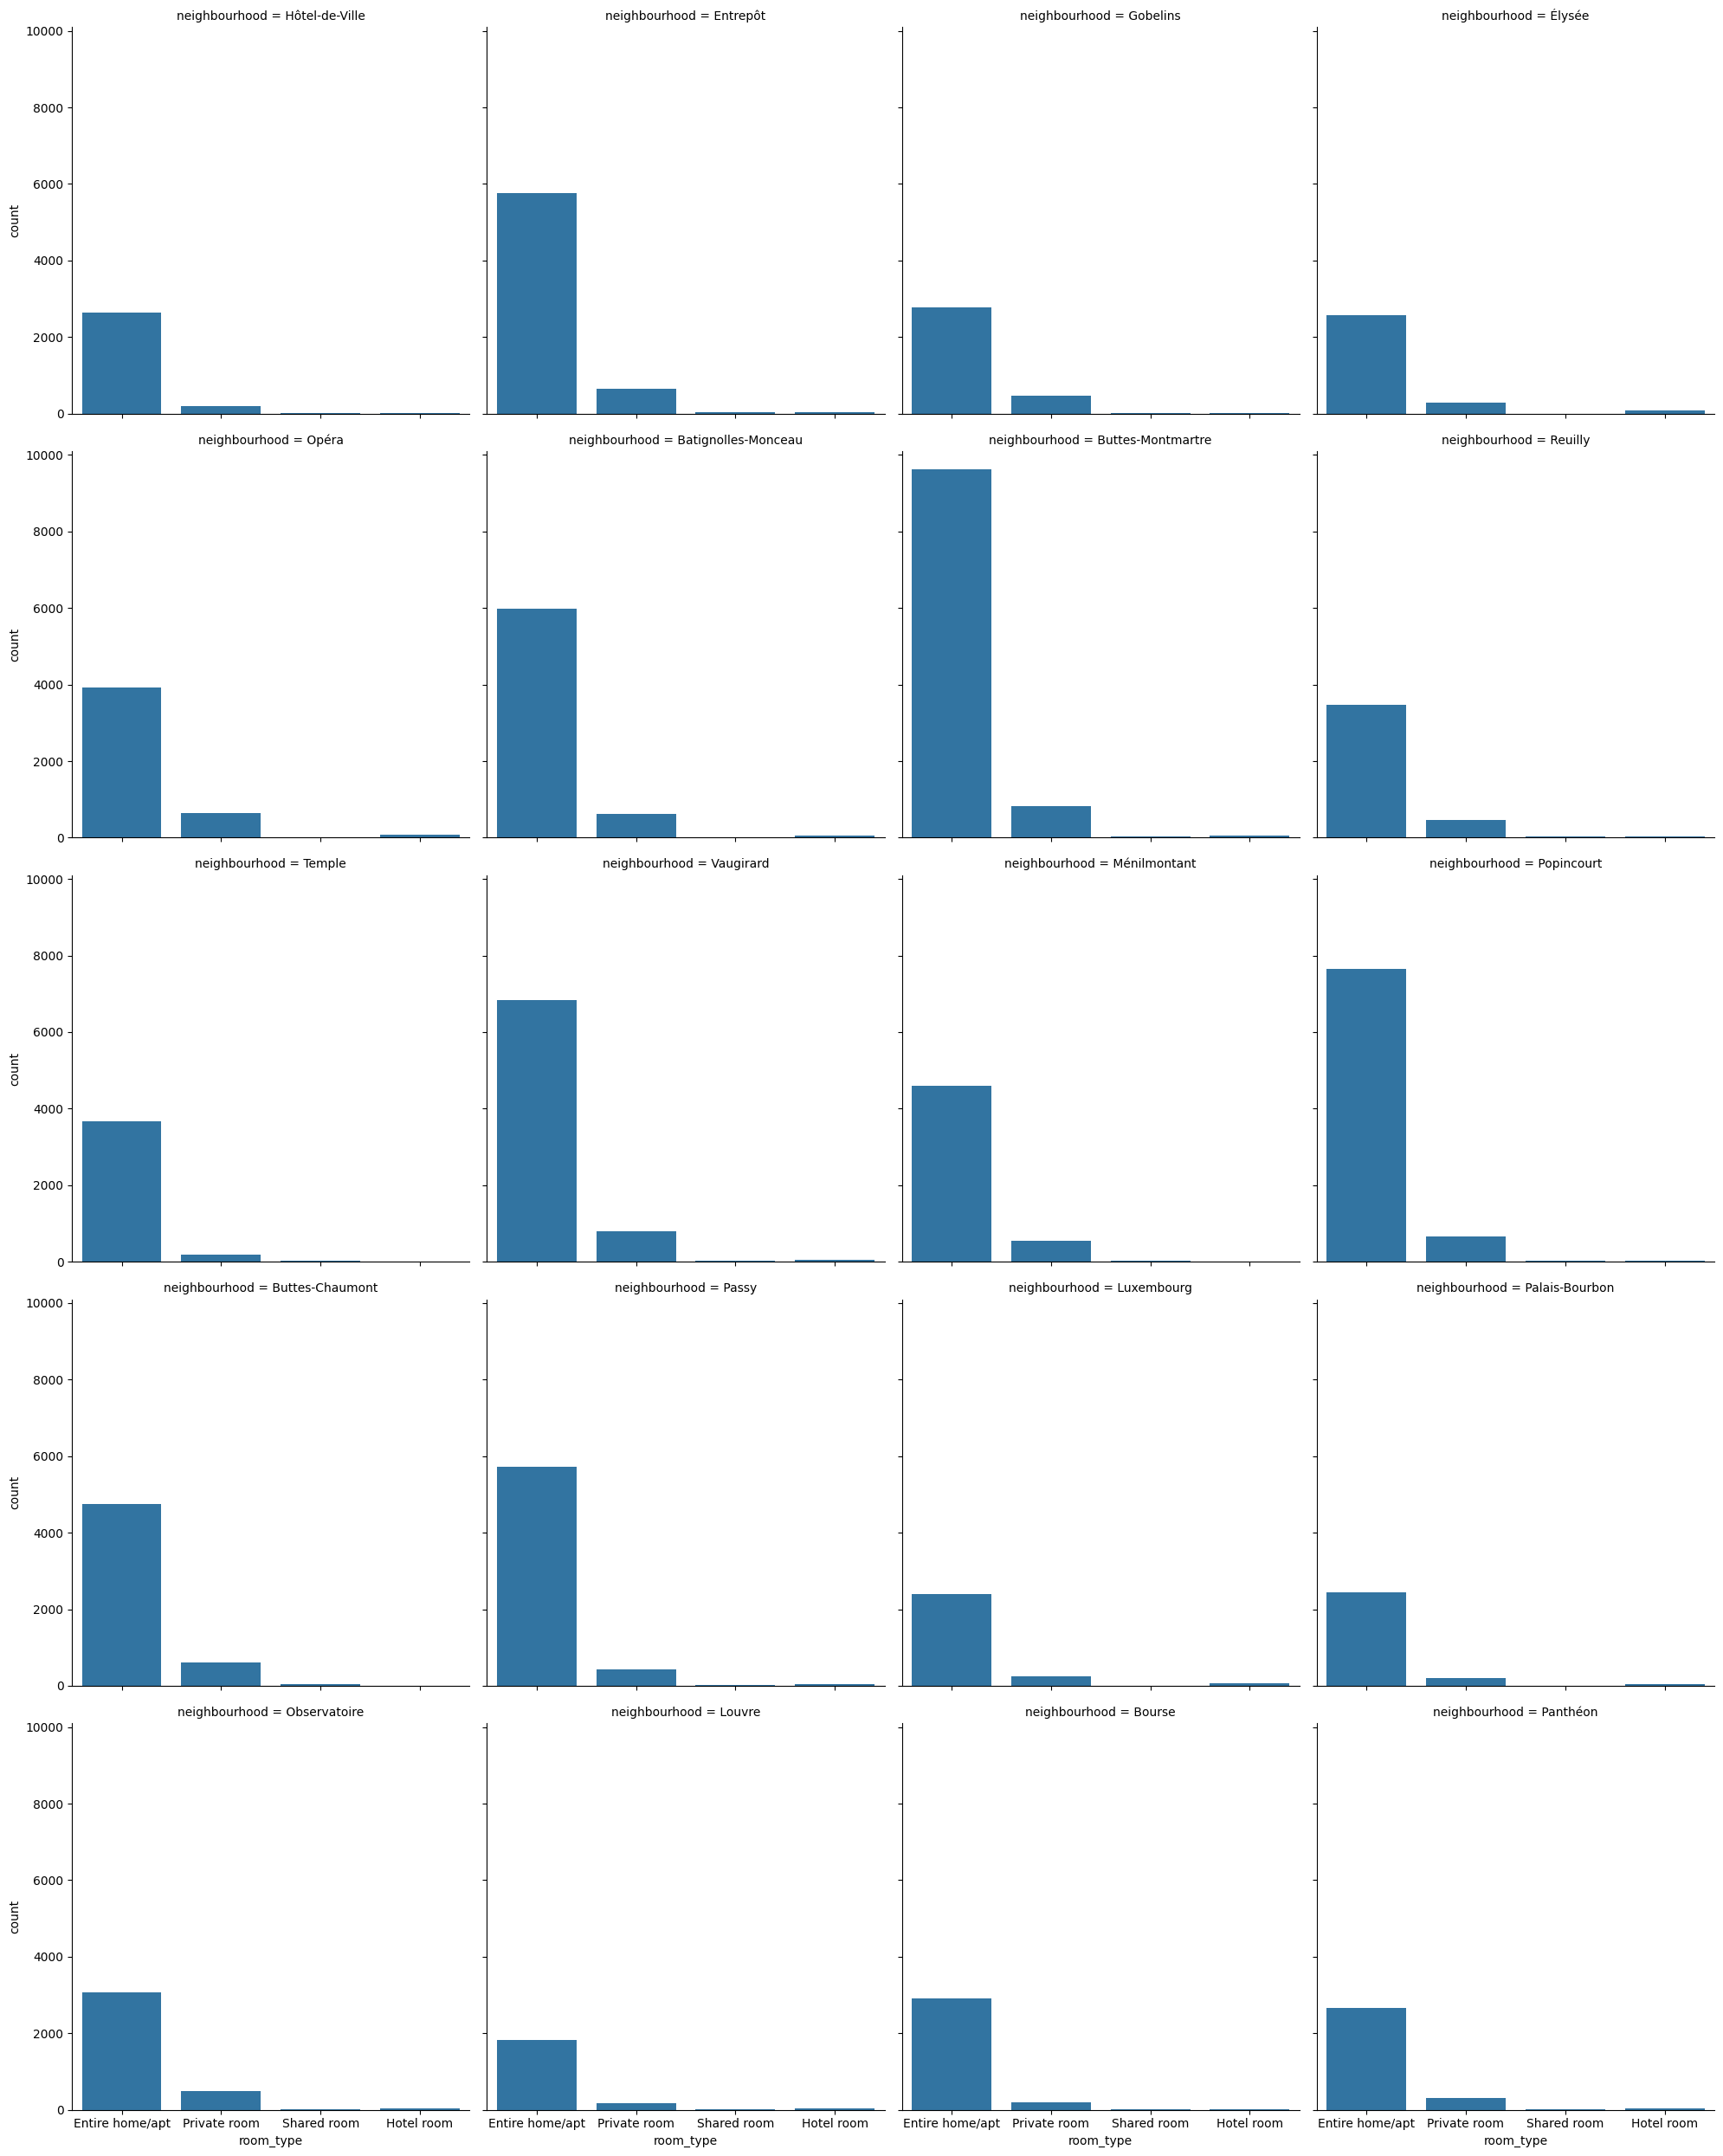

In [21]:
seaborn.catplot(x = "room_type", data = data, kind = "count", col = "neighbourhood", col_wrap = 4);

## Représenter les logements dans un nuage de points, en mettant une couleur par neighboorhood

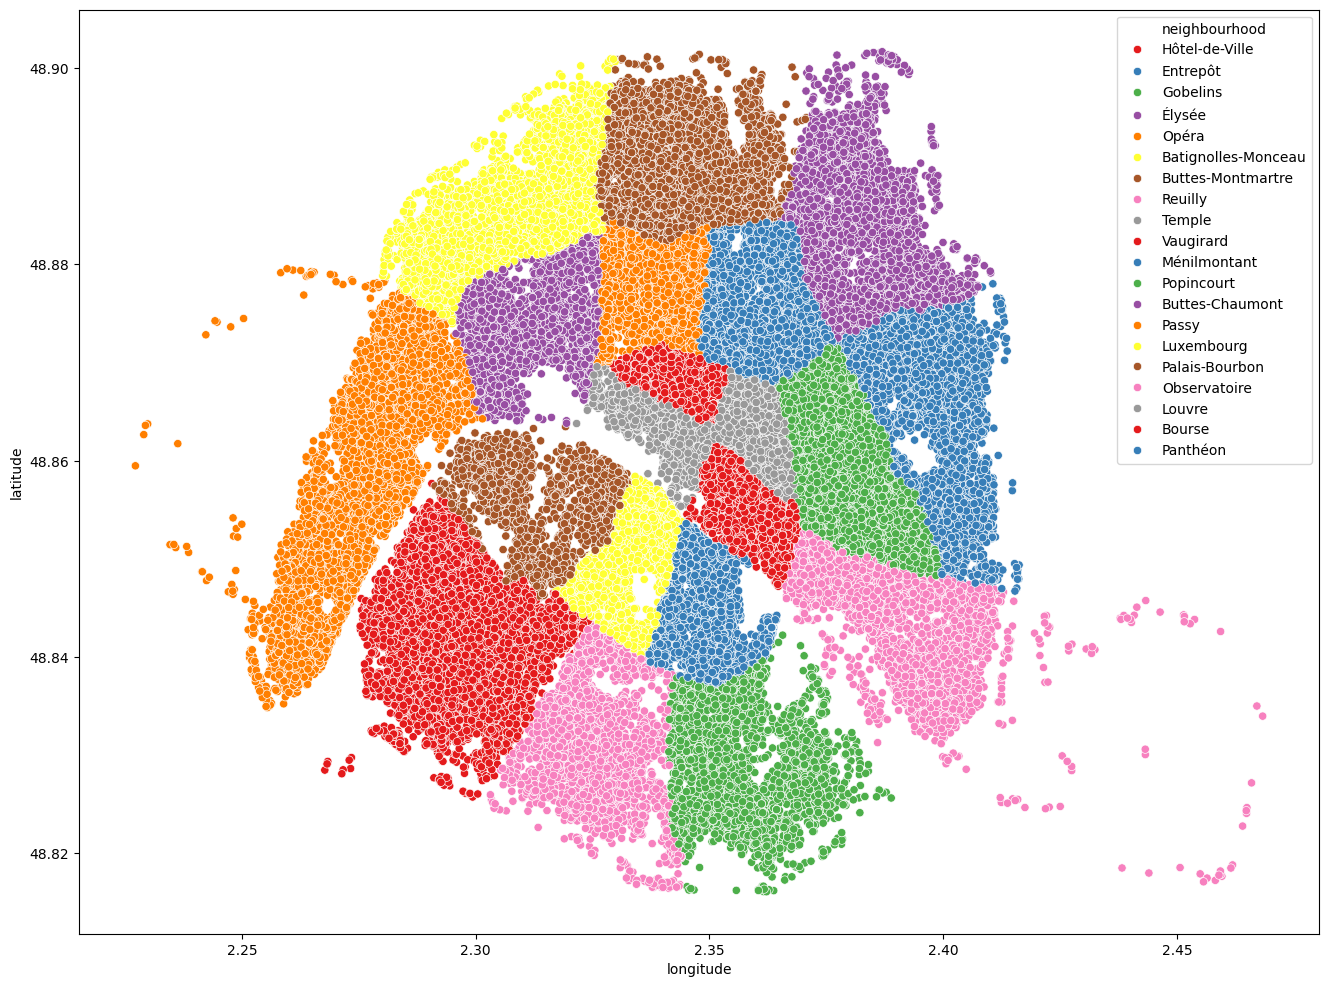

In [22]:
matplotlib.pyplot.figure(figsize = (16, 12))
seaborn.scatterplot(data = data, x = "longitude", y = "latitude", hue = "neighbourhood",
                    palette = "Set1");

## Ajouter l'information sur price pour chaque point dans ce graphique

Noter qu'il est difficile de réellement voir l'effet prix sur cette visualisation.

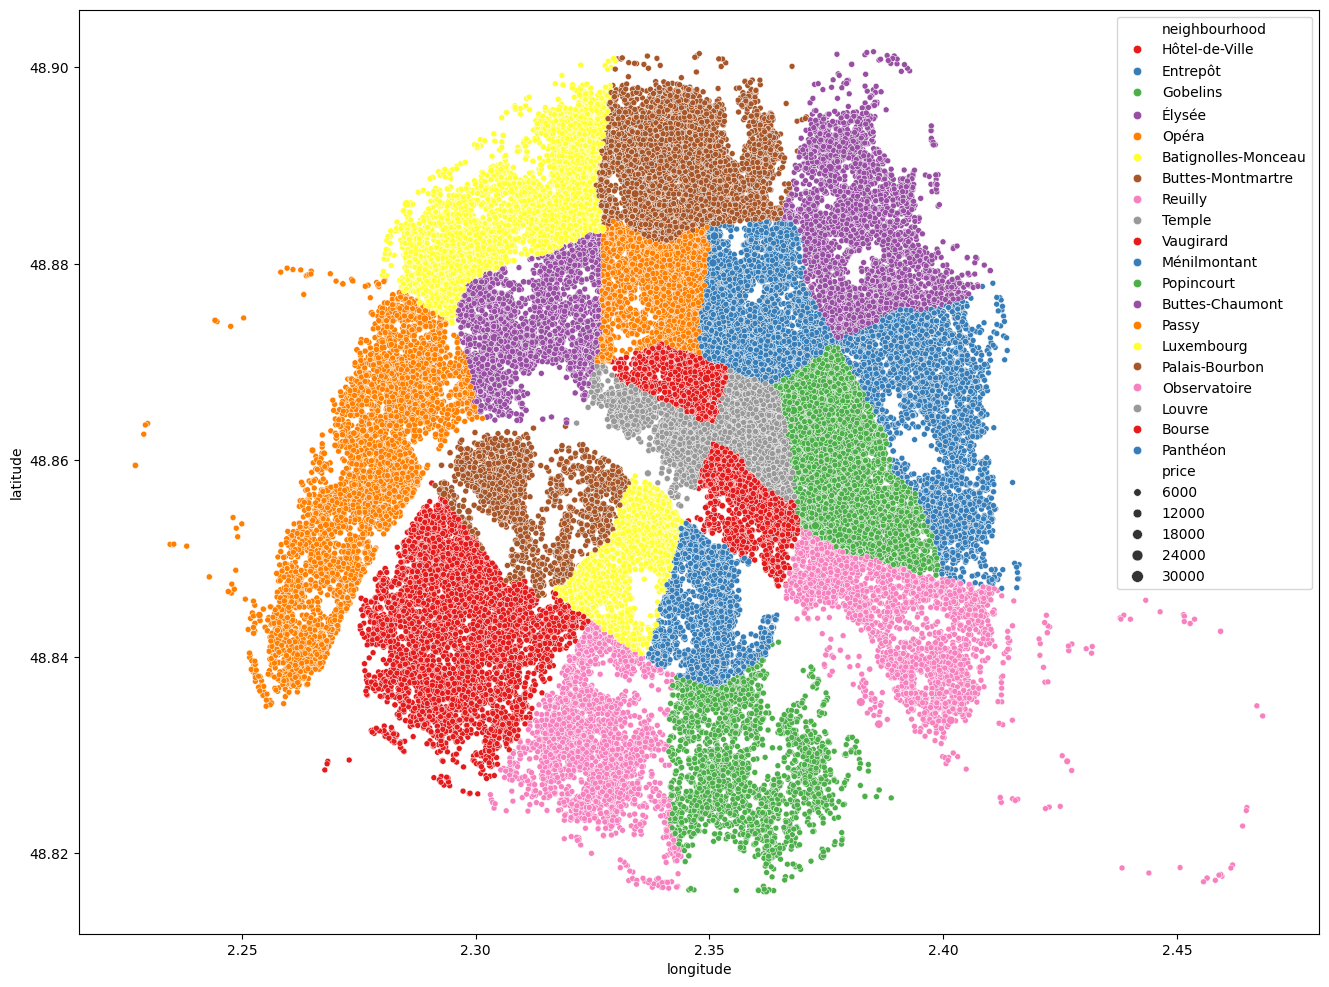

In [23]:
matplotlib.pyplot.figure(figsize = (16, 12))
seaborn.scatterplot(data = data, x = "longitude", y = "latitude", hue = "neighbourhood", size = "price",
                    palette = "Set1");